# Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import random

%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Setup

In [2]:
import gym
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
state = env.reset()

In [4]:
state

array([-0.02708249,  0.01679648, -0.01254684, -0.02728028])

In [5]:
pos, vel, ang, ang_vel = state
print(pos)
print(vel)
print(ang)
print(ang_vel)

-0.02708249017843758
0.01679648216085325
-0.012546842702097015
-0.02728028218801065


In [6]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, state):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = state
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, state):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, state)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


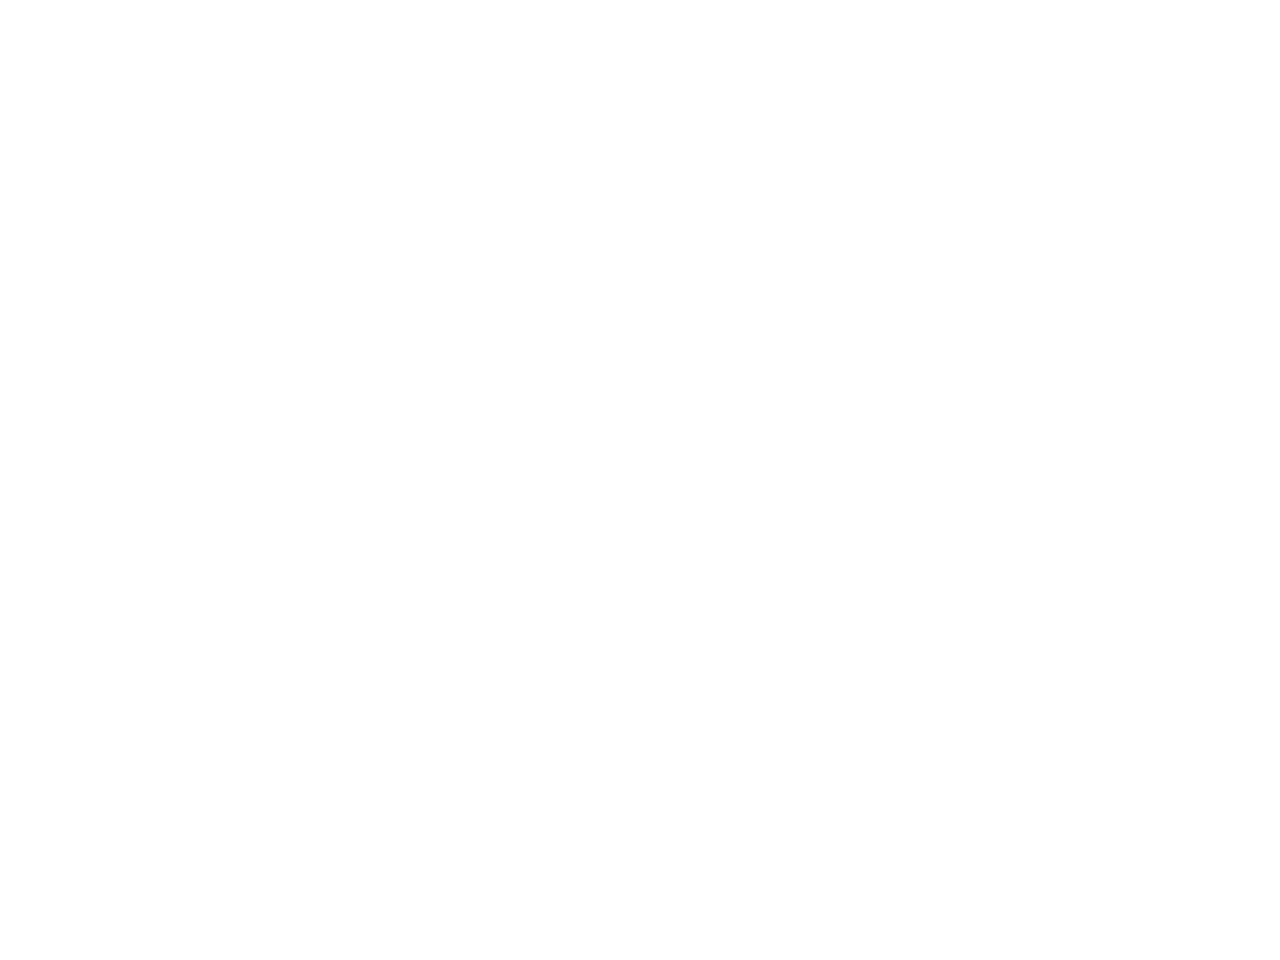

In [7]:
plot_cart_pole(env, state);

# Experimentation

In [8]:
env.action_space

Discrete(2)

In [9]:
env.observation_space

Box(4,)

## Take 1 step right

[ 0.04574738  0.2358388   0.02684987 -0.31101844]
1.0
False


<IPython.core.display.Javascript object>


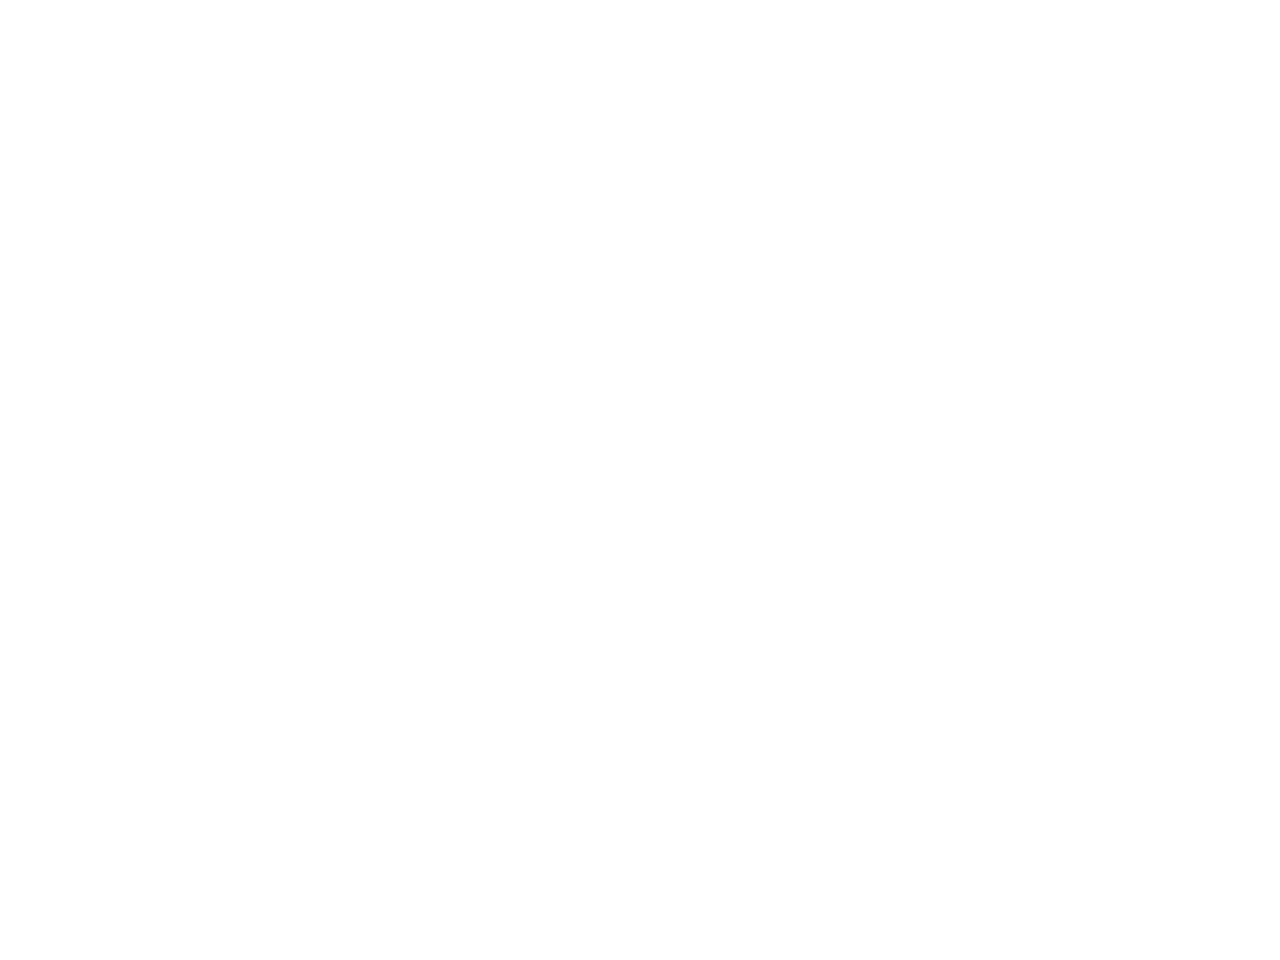

(-0.5, 599.5, 399.5, -0.5)

In [10]:
state = env.reset()
state, reward, done, info = env.step(1)
print(state)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Take 1 step left

[ 0.03141701 -0.15609414  0.00884307  0.24934452]
1.0
False


<IPython.core.display.Javascript object>


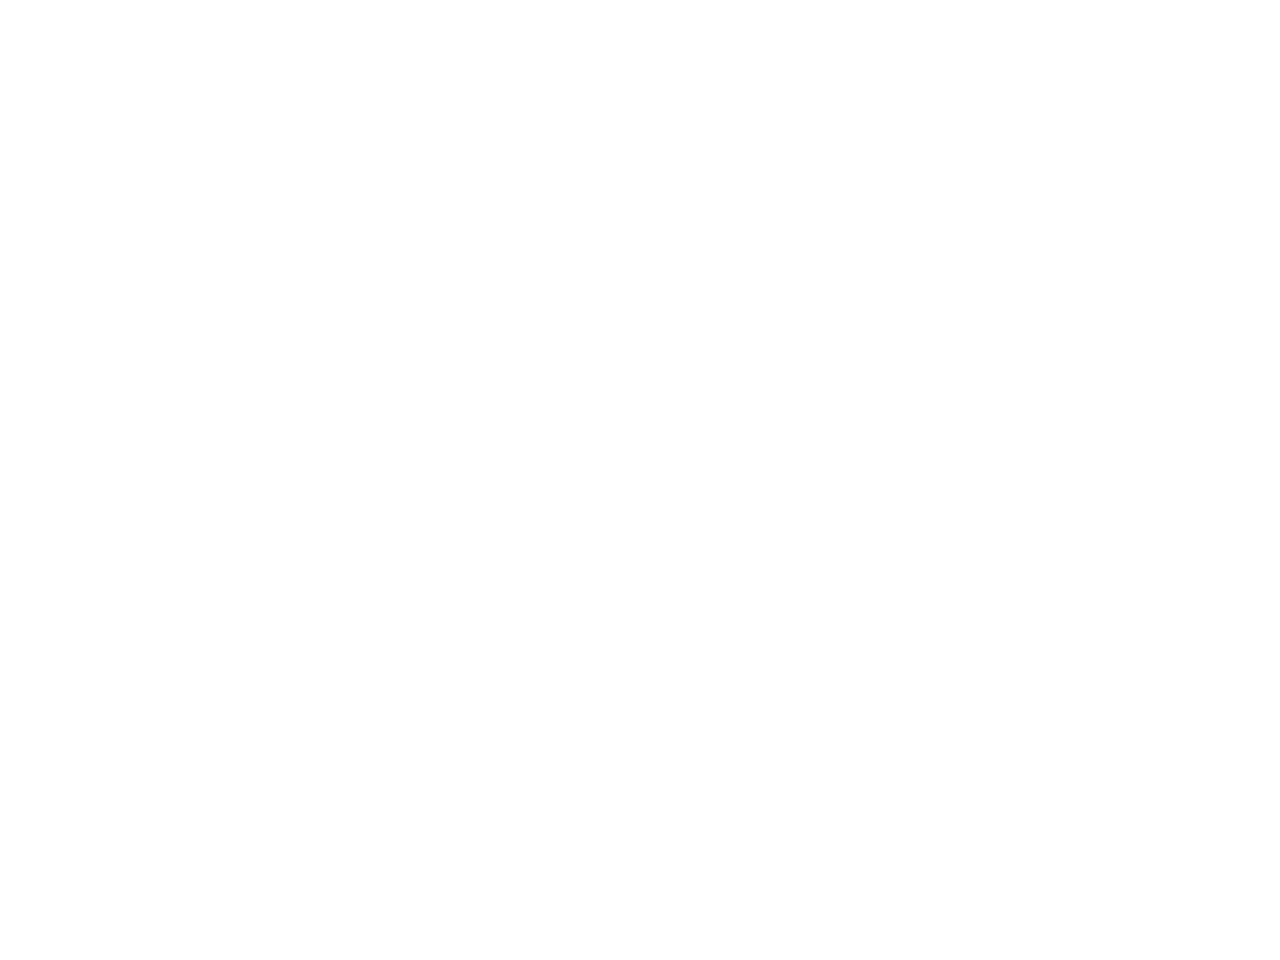

(-0.5, 599.5, 399.5, -0.5)

In [11]:
state = env.reset()
state, reward, done, info = env.step(0)
print(state)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Keep going left until fall

[-0.01124197 -0.20594881 -0.01779211  0.23983079]
[-0.01536095 -0.40081213 -0.01299549  0.52684891]
[-0.02337719 -0.59574884 -0.00245851  0.81540871]
[-0.03529217 -0.79083704  0.01384966  1.10731733]
[-0.05110891 -0.98613828  0.03599601  1.40431277]
[-0.07083167 -1.18168825  0.06408226  1.70802825]
[-0.09446544 -1.3774857   0.09824283  2.01994889]
[-0.12201515 -1.57347914  0.1386418   2.34135839]
[-0.15348473 -1.76955091  0.18546897  2.67327421]
[-0.18887575 -1.96549891  0.23893446  3.0163712 ]


<IPython.core.display.Javascript object>


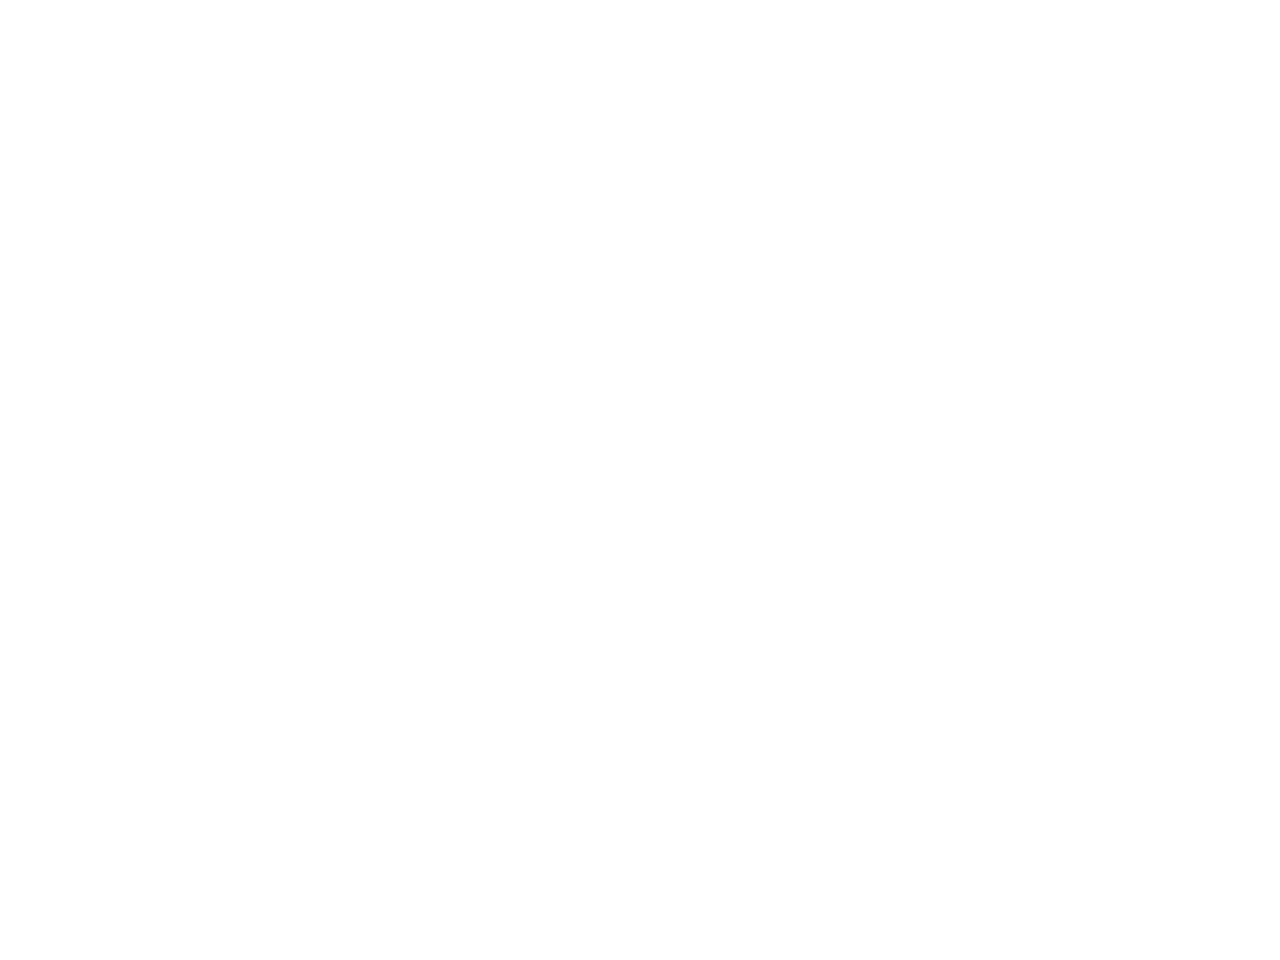

(-0.5, 599.5, 399.5, -0.5)

In [12]:
state = env.reset()
while True:
    state, reward, done, info = env.step(0)
    print(state)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

## Keep going right until fall

[ 0.02123698  0.15068618 -0.03274083 -0.29591639]
[ 0.0242507   0.34625921 -0.03865916 -0.59874281]
[ 0.03117589  0.54190014 -0.05063402 -0.9033479 ]
[ 0.04201389  0.73767003 -0.06870097 -1.21150641]
[ 0.05676729  0.93360829 -0.0929311  -1.52490269]
[ 0.07543946  1.12972126 -0.12342916 -1.84508524]
[ 0.09803388  1.32596888 -0.16033086 -2.17341328]
[ 0.12455326  1.52224925 -0.20379913 -2.51099332]
[ 0.15499824  1.71838089 -0.25401899 -2.85860533]


<IPython.core.display.Javascript object>


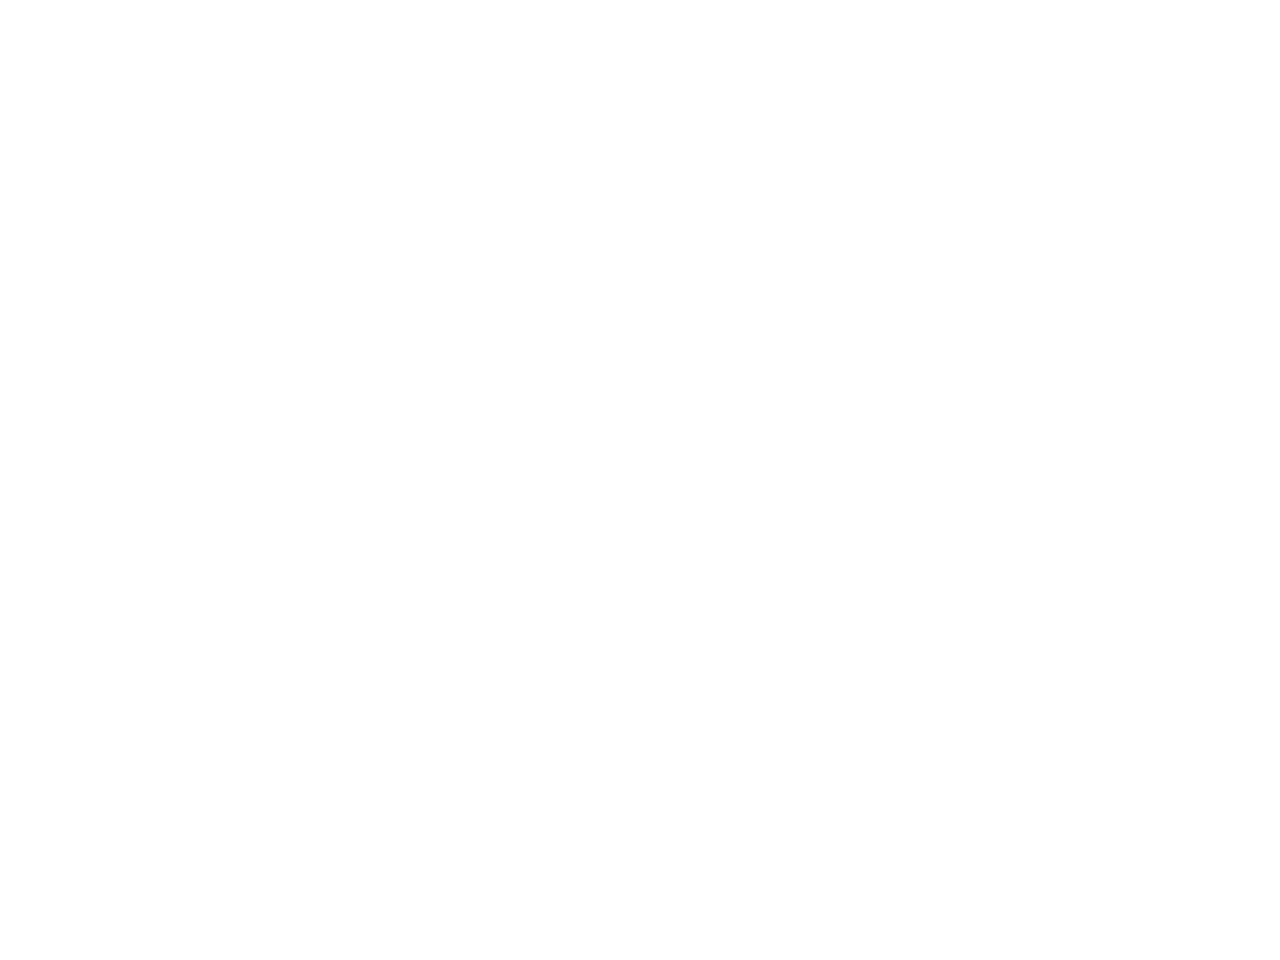

(-0.5, 599.5, 399.5, -0.5)

In [13]:
state = env.reset()
while True:
    state, reward, done, info = env.step(1)
    print(state)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, state)
plt.imshow(img)
plt.axis("off")

# Improve Cart-Pole

## Animation functions

In [14]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

## Custom Policy
1. if angle and angular_velocity are both <0, then it is definitely failling left => move left to balance
2. if angle and angular_velocity are both >0, then it is definitely failling right => move right to balance
3. if above are both false => just move random for 1 step

In [15]:
def custom_policy(state, env):
    ang = state[2]
    ang_vel = state[3]
    if ang<0 and ang_vel<0: # falling left => move left
        return 0
    if ang>0 and ang_vel>0: # falling right => move right
        return 1    
    return env.action_space.sample() # play randomly

In [16]:
print(env._max_episode_steps)

200


In [17]:
def run_policy(num_of_episodes, max_steps=None):
    if max_steps is not None:
        env._max_episode_steps = max_steps
    print("Max episode steps:", env._max_episode_steps)
    frames = []
    rewards = []
    for episode in range(num_of_episodes):
        episode_reward = 0
        state = env.reset()
        for step in range(env._max_episode_steps):
            if episode==0: # check out 1 animation
                img = render_cart_pole(env, state)
                frames.append(img)

            action = custom_policy(state, env)
            state, reward, done, info = env.step(action)        
            episode_reward += reward
            if done:            
                break
        rewards.append(episode_reward)
        print(episode, episode_reward)
    return rewards, frames

### Try with the definition of `solved` as per the docs – 100 consecutive trials with default max_episode_steps

In [18]:
rewards, frames = run_policy(100)

Max episode steps: 200
0 200.0
1 200.0
2 200.0
3 200.0
4 200.0
5 200.0
6 200.0
7 200.0
8 200.0
9 200.0
10 200.0
11 200.0
12 200.0
13 200.0
14 200.0
15 200.0
16 200.0
17 200.0
18 200.0
19 200.0
20 200.0
21 200.0
22 200.0
23 200.0
24 200.0
25 200.0
26 200.0
27 200.0
28 200.0
29 200.0
30 200.0
31 200.0
32 200.0
33 200.0
34 200.0
35 200.0
36 200.0
37 200.0
38 200.0
39 200.0
40 200.0
41 200.0
42 200.0
43 200.0
44 200.0
45 200.0
46 200.0
47 200.0
48 200.0
49 200.0
50 200.0
51 200.0
52 200.0
53 200.0
54 200.0
55 200.0
56 200.0
57 200.0
58 200.0
59 200.0
60 200.0
61 200.0
62 200.0
63 200.0
64 200.0
65 200.0
66 200.0
67 200.0
68 200.0
69 200.0
70 200.0
71 200.0
72 200.0
73 200.0
74 200.0
75 200.0
76 200.0
77 200.0
78 200.0
79 200.0
80 200.0
81 200.0
82 200.0
83 200.0
84 200.0
85 200.0
86 200.0
87 200.0
88 200.0
89 200.0
90 200.0
91 200.0
92 200.0
93 200.0
94 200.0
95 200.0
96 200.0
97 200.0
98 200.0
99 200.0


In [19]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(200.0, 0.0, 200.0, 200.0)

<IPython.core.display.Javascript object>


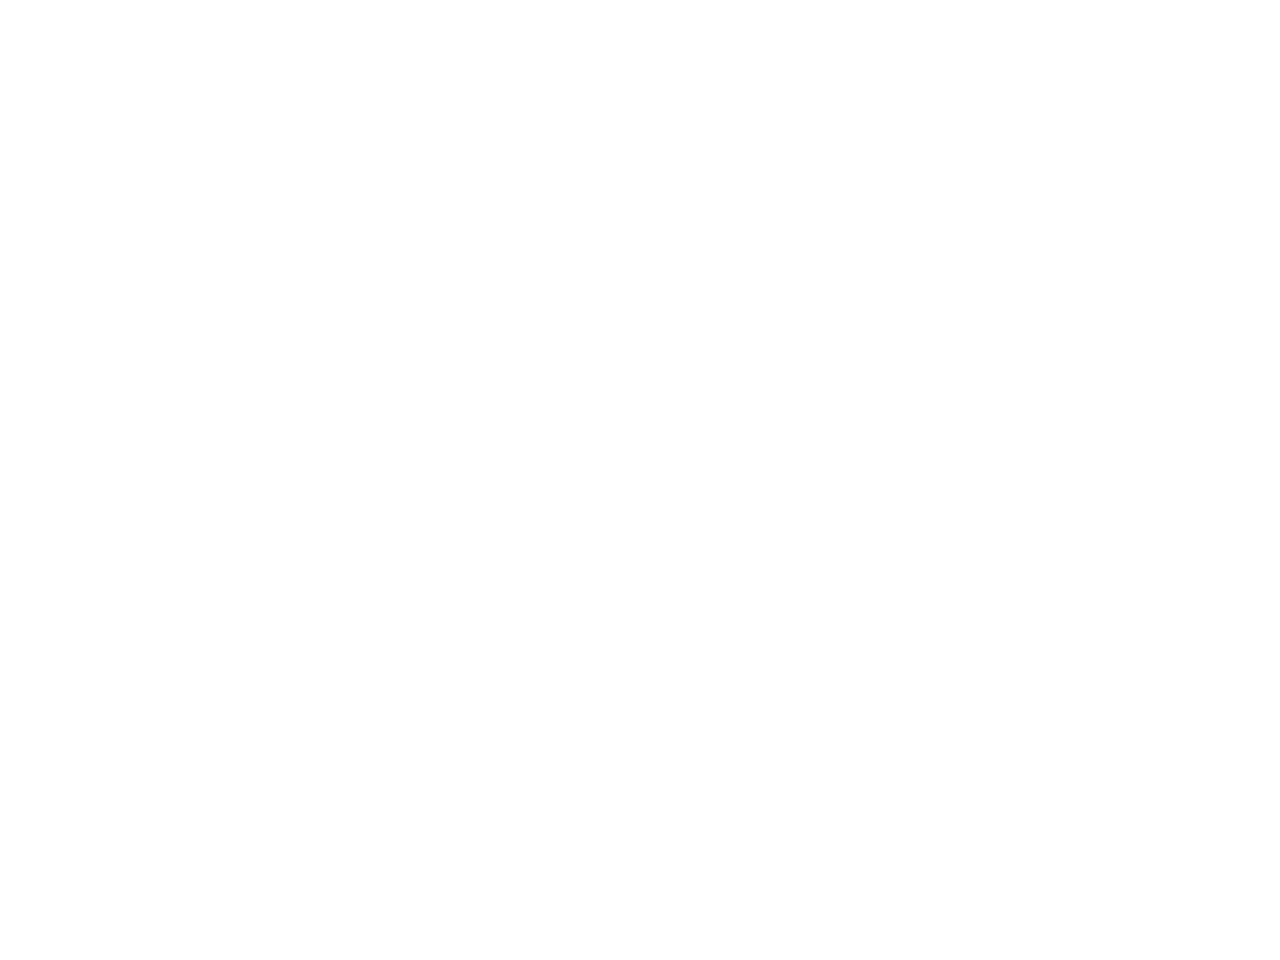

In [20]:
video = plot_animation(frames)
plt.show()

### Try with 100 consecutive trials with max_episode_steps as 1000

In [21]:
rewards, frames = run_policy(100, 1000)

Max episode steps: 1000
0 631.0
1 644.0
2 525.0
3 247.0
4 1000.0
5 724.0
6 992.0
7 509.0
8 532.0
9 335.0
10 306.0
11 679.0
12 409.0
13 1000.0
14 679.0
15 369.0
16 437.0
17 703.0
18 462.0
19 608.0
20 1000.0
21 424.0
22 516.0
23 1000.0
24 555.0
25 547.0
26 460.0
27 908.0
28 1000.0
29 1000.0
30 711.0
31 467.0
32 1000.0
33 544.0
34 874.0
35 375.0
36 491.0
37 322.0
38 219.0
39 462.0
40 395.0
41 825.0
42 577.0
43 445.0
44 611.0
45 489.0
46 451.0
47 1000.0
48 886.0
49 721.0
50 287.0
51 766.0
52 716.0
53 974.0
54 1000.0
55 686.0
56 877.0
57 1000.0
58 907.0
59 570.0
60 533.0
61 1000.0
62 372.0
63 657.0
64 818.0
65 325.0
66 748.0
67 1000.0
68 374.0
69 801.0
70 897.0
71 1000.0
72 237.0
73 498.0
74 608.0
75 298.0
76 1000.0
77 499.0
78 370.0
79 472.0
80 306.0
81 507.0
82 653.0
83 308.0
84 537.0
85 322.0
86 571.0
87 372.0
88 487.0
89 886.0
90 632.0
91 609.0
92 302.0
93 683.0
94 1000.0
95 402.0
96 652.0
97 377.0
98 656.0
99 436.0


In [22]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(620.54, 236.46933923872666, 219.0, 1000.0)

<IPython.core.display.Javascript object>


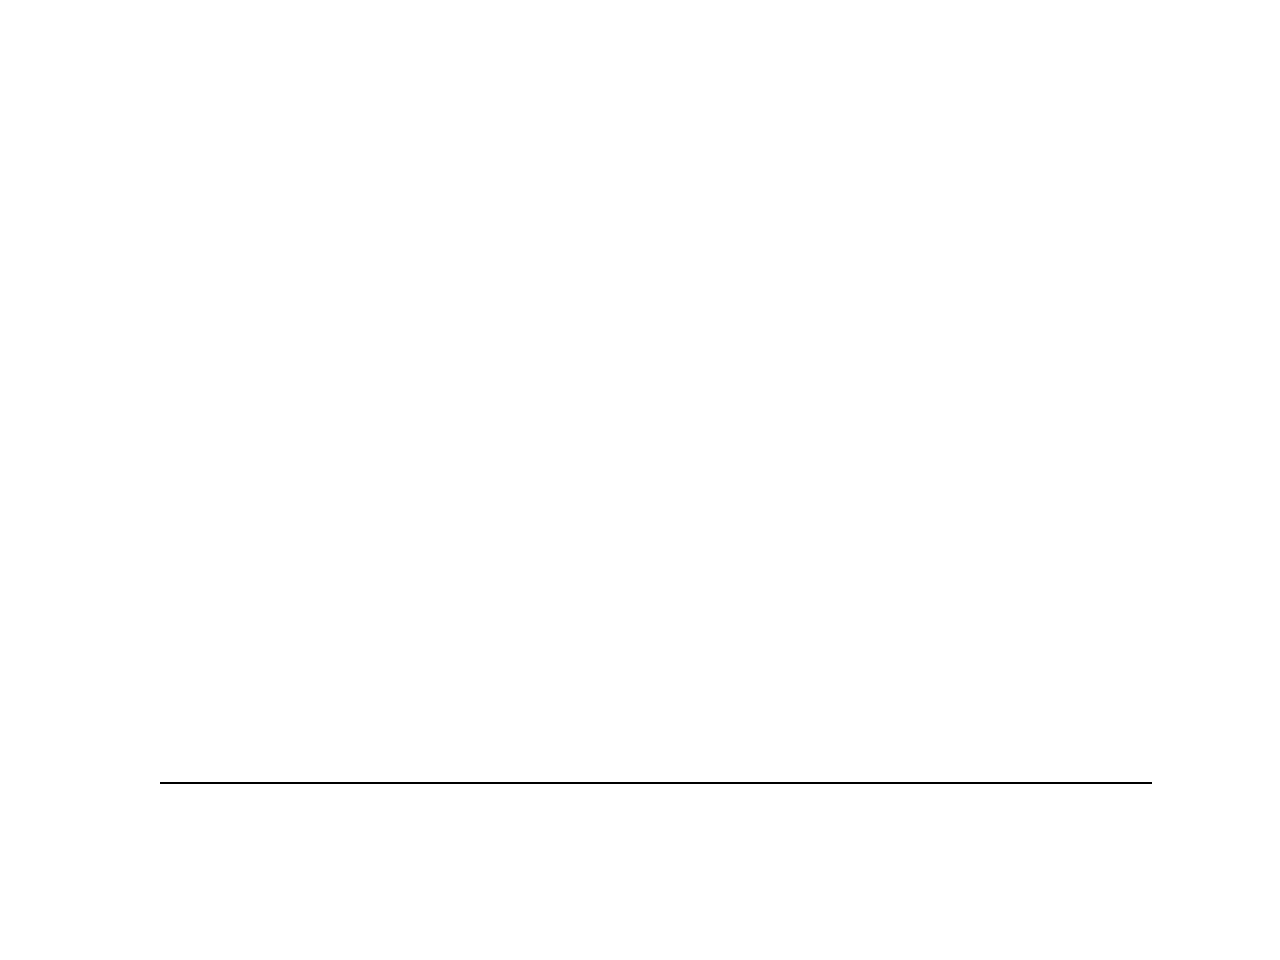

In [23]:
video = plot_animation(frames)
plt.show()

# Solve using Q-Learning

In [24]:
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [25]:
env.action_space

Discrete(2)

In [26]:
env.observation_space

Box(4,)

In [27]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [28]:
env.observation_space.high

array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)

In [29]:
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds

[(-4.8, 4.8),
 (-3.4028235e+38, 3.4028235e+38),
 (-0.41887903, 0.41887903),
 (-3.4028235e+38, 3.4028235e+38)]

In [30]:
# limit the range of velocity just to avoid large numbers (its not playing an important role as we have picked bin_size=1 for it)
state_bounds[1] = (-1.0, 1.0)

# choose the range of angular_velocity same as angle (basically limit the max angle it can turn in 1 sec)
state_bounds[3] = state_bounds[2]

state_bounds

[(-4.8, 4.8),
 (-1.0, 1.0),
 (-0.41887903, 0.41887903),
 (-0.41887903, 0.41887903)]

In [31]:
NUM_BINS = (1, 1, 6, 3)

In [32]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

In [33]:
state = env.reset()
state

array([-0.00900474, -0.04970624,  0.0445888 ,  0.01722048])

In [34]:
def state_to_bin(state):
    bin_indexes = []
    for i in range(len(state)):                
        if state[i]<=state_bounds[i][0]:
            bin_index = 0
        elif state[i]>=state_bounds[i][1]:
            bin_index = NUM_BINS[i]-1
        else:
            param_range = state_bounds[i][1] - state_bounds[i][0] # total range from min => max
            # convert the observed param value to be in the scale of (0, max-min) => by subtracting min
            # this helps evaluating bin_index easy (indexes are integers starting from 0)
            param_obs = state[i]-(state_bounds[i][0])
            bin_index = int(param_obs/(param_range/NUM_BINS[i]))
            
        bin_indexes.append(bin_index)
    
    return tuple(bin_indexes)

In [35]:
state_bin = state_to_bin(state)
state_bin

(0, 0, 3, 1)

In [36]:
SOLVED_AVG_STEPS = 195.0
SOLVED_CONSECUTIVE_TRIALS = 100

In [37]:
total_episodes = 1000

min_learning_rate = 0.1
gamma = 1.0

# Exploration parameters
epsilon = 1.0
min_epsilon = 0.01

In [38]:
import math
def get_exploration_rate(t):
    return max(min_epsilon, min(1, 1.0 - math.log10((t+1)/25)))

def get_learning_rate(t):
    return max(min_learning_rate, min(0.5, 1.0 - math.log10((t+1)/25)))

In [39]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

episode_steps = []
streak = 0

for episode in range(total_episodes):
    if episode%50 == 0:
        print("*"*50)
        print("Episode", episode)
    state = env.reset()
    done = False
    
    epsilon = get_exploration_rate(episode)
    learning_rate = get_learning_rate(episode)    
    
    for step in range(env._max_episode_steps):
        state_bin = state_to_bin(state) # discretize continuous state
        
        # explore or exploit
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample() # random
        else:
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
        
        # take action
        new_state, reward, done, info = env.step(action)
        new_state_bin = state_to_bin(new_state)

        # update Q-table
        qtable[state_bin + (action,)] += learning_rate * (reward + gamma*np.max(qtable[new_state_bin]) - qtable[state_bin + (action,)])
        
        state = new_state
        
        if done:
            if streak == 0 and step > SOLVED_AVG_STEPS:
                episode_steps = []
            episode_steps.append(step)
            break 
            
    if np.mean(episode_steps) >= SOLVED_AVG_STEPS:
        streak += 1
    else:
        streak = 0
        
    if streak >= SOLVED_CONSECUTIVE_TRIALS:
        print("Solved in %d episodes" % episode)
        break

**************************************************
Episode 0
**************************************************
Episode 50
**************************************************
Episode 100
**************************************************
Episode 150
**************************************************
Episode 200
**************************************************
Episode 250
Solved in 259 episodes


## Alternate way of testing the policy

In [42]:
'''
    CartPole-v0 defines "solving" as getting average reward of 195.0 over 100 consecutive trials.
'''

SOLVED_AVG_STEPS = 195.0
SOLVED_CONSECUTIVE_TRIALS = 100

def test_policy():
    episode_steps = []
    for episode in range(SOLVED_CONSECUTIVE_TRIALS):
        state = env.reset()
        done = False
        
        for step in range(env._max_episode_steps):
            state_bin = state_to_bin(state) # discretize continuous state
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
            new_state, reward, done, info = env.step(action)
            state = new_state
            
            if done:                
                episode_steps.append(step)
                break
        
        if np.mean(episode_steps) < SOLVED_AVG_STEPS:            
            return False
        
    return True

In [43]:
qtable = np.zeros(NUM_BINS + (env.action_space.n,))

for episode in range(total_episodes):
    if episode%10 == 0:
        print("*"*50)
        print("Episode", episode)
    state = env.reset()
    done = False
    
    epsilon = get_exploration_rate(episode)
    learning_rate = get_learning_rate(episode)    
    
    for step in range(env._max_episode_steps):
        state_bin = state_to_bin(state) # discretize continuous state
        
        # explore or exploit
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample() # random
        else:
            action = np.argmax(qtable[state_bin]) # action with the highest Q-value, for a given state
        
        # take action
        new_state, reward, done, info = env.step(action)
        new_state_bin = state_to_bin(new_state)

        # update Q-table
        qtable[state_bin + (action,)] += learning_rate * (reward + gamma*np.max(qtable[new_state_bin]) - qtable[state_bin + (action,)])
        
        state = new_state
        
        if done:
            break
            
    if test_policy():
        print("Solved in %d episodes" % episode)
        break

**************************************************
Episode 0
**************************************************
Episode 10
**************************************************
Episode 20
**************************************************
Episode 30
Solved in 35 episodes
